In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Read the data

In [2]:
df = pd.read_csv('dataset_small.csv')

In [3]:
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,...,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,...,1,2,1,389,1,1,0,0,0,1


In [4]:
df.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,...,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,2.284338,0.457123,0.171285,1.937522,0.014102,0.311177,0.033456,0.212959,0.004451,0.001535,...,1.110666,2.829619,1.630113,5056.676272,0.501373,0.303419,0.001279,0.002234,0.008287,0.522585
std,1.473209,1.339340,0.801919,2.037525,0.138156,1.159198,0.343272,1.130323,0.107352,0.089320,...,0.912962,1.377018,1.719554,7102.853538,0.500002,0.815315,0.037599,0.047927,0.090657,0.499494
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,288.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,1191.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,9866.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,16.000000,20.000000,86400.000000,1.000000,17.000000,1.000000,1.000000,1.000000,1.000000


### class balance

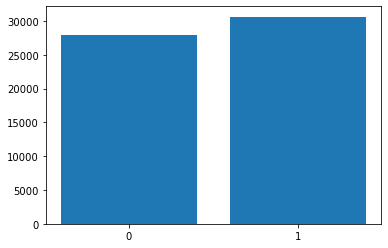

In [5]:
x = df[df['phishing']==0].count().unique()
y = df[df['phishing']==1].count().unique()
classes = [0,1]
arr = [x[0],y[0]]
plt.bar(classes,arr)
ax = plt.gca()
ax.set_xticks(classes)

## Preprocessing

In [6]:
df.isnull().sum().sum()
df.shape

(58645, 112)

### there are no missing values in the dataset

In [7]:
df.iloc[:10,:25]

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain
0,2,0,0,0,0,0,0,0,0,0,...,0,0,1,14,2,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,...,0,0,1,38,4,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,1,24,1,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,0,0,1,38,2,0,0,0,0,0
4,1,1,0,4,0,0,0,0,0,0,...,0,0,1,46,1,1,0,0,0,0
5,1,1,0,4,0,0,0,0,0,0,...,0,0,1,45,1,0,0,0,0,0
6,1,0,0,3,0,0,0,0,0,0,...,0,0,1,32,1,0,0,0,0,0
7,2,0,0,0,0,0,0,0,0,0,...,0,0,1,29,2,0,0,0,0,0
8,2,0,0,2,0,0,0,0,0,0,...,0,0,1,18,2,0,0,0,0,0
9,1,0,0,1,0,0,0,0,0,0,...,0,0,1,11,1,0,0,0,0,0


In [8]:
df.shape

(58645, 112)

### Checking for duplicate values

In [9]:
for i in df.duplicated():
    if i==True:
        print(i)
# there are no duplicates in the dataset

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [10]:
df[df['qty_ip_resolved']<0]

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
37,1,3,0,2,0,0,0,0,0,0,...,-1,4,0,-1,0,-1,0,0,0,1
41,3,2,0,1,0,0,0,0,0,0,...,-1,4,0,-1,0,-1,0,0,0,0
45,2,1,0,2,0,0,0,0,0,0,...,-1,2,0,-1,0,-1,0,0,0,0
49,3,12,0,3,0,0,0,0,0,0,...,-1,6,0,-1,0,-1,0,0,0,0
83,1,0,0,0,0,0,0,0,0,0,...,-1,4,0,-1,0,-1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58579,2,0,0,0,0,0,0,0,0,0,...,-1,2,2,-1,0,-1,0,0,0,0
58586,2,1,0,0,0,0,0,0,0,0,...,-1,6,0,-1,0,-1,0,0,0,0
58609,2,0,0,0,0,0,0,0,0,0,...,-1,4,0,-1,0,-1,0,0,0,0
58614,2,0,0,0,0,0,0,0,0,0,...,-1,4,0,-1,0,-1,0,0,0,0


In [11]:
df[df['qty_redirects']<0]

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
23,1,1,0,1,0,0,0,0,0,0,...,1,2,0,657,0,-1,0,0,0,0
37,1,3,0,2,0,0,0,0,0,0,...,-1,4,0,-1,0,-1,0,0,0,1
40,2,7,0,4,0,0,0,0,0,0,...,1,3,7,271,0,-1,0,0,0,0
41,3,2,0,1,0,0,0,0,0,0,...,-1,4,0,-1,0,-1,0,0,0,0
45,2,1,0,2,0,0,0,0,0,0,...,-1,2,0,-1,0,-1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58596,1,0,0,1,0,0,0,0,0,0,...,2,2,1,299,0,-1,0,0,0,0
58606,1,0,0,0,0,0,0,0,0,0,...,1,2,0,3388,0,-1,0,0,0,0
58609,2,0,0,0,0,0,0,0,0,0,...,-1,4,0,-1,0,-1,0,0,0,0
58614,2,0,0,0,0,0,0,0,0,0,...,-1,4,0,-1,0,-1,0,0,0,0


In [12]:
result = (df < 0).apply(lambda x: any(x))

In [13]:
type(result)

pandas.core.series.Series

In [14]:
res = list(zip(result.index,result))

In [15]:
cols_with_atleast_one_negative_val = []
for col,val in res:
    if val == True:
        cols_with_atleast_one_negative_val.append(col)

In [16]:
len(cols_with_atleast_one_negative_val)

66

In [17]:
res2 = (df.where(df<0).count())
print(res2)
res3 = list(zip(res2.index, res2))
# print(res2['qty_dot_directory'])
list_of_col_count_pairs = []
for col,count in res3:
    if count>0:
        list_of_col_count_pairs.append((col,count))
print(len(df))
print(list_of_col_count_pairs)

cols_to_drop = [] # list of cols with more than 5000 negative entries
cols_with_less_negatives = [] # list of cols with less than 5000 negative entries

for col,count in list_of_col_count_pairs:
    if count>5000:
        cols_to_drop.append(col)
    elif count<=5000:
        cols_with_less_negatives.append(col)
print(f'We need to drop {len(cols_to_drop)} columns')
        

qty_dot_url                0
qty_hyphen_url             0
qty_underline_url          0
qty_slash_url              0
qty_questionmark_url       0
                        ... 
qty_redirects           5519
url_google_index           4
domain_google_index        2
url_shortened              0
phishing                   0
Length: 112, dtype: int64
58645
[('qty_dot_directory', 17507), ('qty_hyphen_directory', 17507), ('qty_underline_directory', 17507), ('qty_slash_directory', 17507), ('qty_questionmark_directory', 17507), ('qty_equal_directory', 17507), ('qty_at_directory', 17507), ('qty_and_directory', 17507), ('qty_exclamation_directory', 17507), ('qty_space_directory', 17507), ('qty_tilde_directory', 17507), ('qty_comma_directory', 17507), ('qty_plus_directory', 17507), ('qty_asterisk_directory', 17507), ('qty_hashtag_directory', 17507), ('qty_dollar_directory', 17507), ('qty_percent_directory', 17507), ('directory_length', 17507), ('qty_dot_file', 17507), ('qty_hyphen_file', 17507), ('qt

In [18]:
# drop the columns with negative values

new_df = df.drop(cols_to_drop, axis=1)

# new_df is the new dataframe
# now we need to drop the rows where the other columns have < 5000 negative values 

new_df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,asn_ip,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,8560,1,4,2,3598,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,...,263283,1,4,1,3977,1,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,26496,1,2,1,10788,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,20013,1,2,1,14339,1,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,...,41828,1,2,1,389,1,0,0,0,1


In [19]:
temp_df = new_df
print(len(cols_with_less_negatives))
for col in cols_with_less_negatives:
    df_filtered = temp_df[temp_df[col] >= 0]
    temp_df = df_filtered


6


In [20]:
len(new_df)

58645

In [21]:
df_filtered.head(10)
len(df_filtered)

51864

In [22]:
# df_filtered is the final df without negative ones
df_filtered.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,asn_ip,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,url_google_index,domain_google_index,url_shortened,phishing
count,51864.000000,51864.000000,51864.000000,51864.000000,51864.000000,51864.000000,51864.000000,51864.000000,51864.000000,51864.000000,...,51864.000000,51864.000000,51864.000000,51864.000000,51864.000000,51864.000000,51864.000000,51864.000000,51864.000000,51864.000000
mean,2.292496,0.463173,0.177946,2.020322,0.014056,0.326334,0.035747,0.224645,0.004897,0.001485,...,36274.078262,1.245932,2.792284,1.720018,5375.829246,0.545581,0.001273,0.002140,0.009371,0.548261
std,1.497859,1.364797,0.802676,2.046302,0.140429,1.189016,0.361130,1.158060,0.113044,0.085246,...,51656.542198,0.754552,1.363649,1.727974,7144.310316,0.497923,0.035651,0.046213,0.096348,0.497670
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15169.000000,1.000000,2.000000,1.000000,292.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,23352.000000,1.000000,2.000000,1.000000,1796.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,40034.000000,1.000000,4.000000,2.000000,10790.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,395754.000000,24.000000,16.000000,20.000000,86400.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Check if data is still balanced!

In [23]:
df_filtered[df_filtered['phishing']==0].count().unique()

array([23429])

In [24]:
df_filtered[df_filtered['phishing']==1].count().unique()

array([28435])

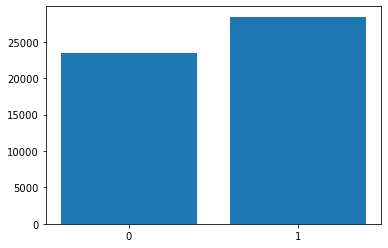

In [25]:
x = df_filtered[df_filtered['phishing']==0].count().unique()
y = df_filtered[df_filtered['phishing']==1].count().unique()
classes = [0,1]
arr = [x[0],y[0]]
plt.bar(classes,arr)
ax = plt.gca()
ax.set_xticks(classes)

In [26]:
len_url = df_filtered['length_url']
target = df_filtered['phishing']

In [27]:
df_filtered.iloc[:,-1]

0        0
1        0
2        0
3        1
4        1
        ..
58640    1
58641    0
58642    1
58643    0
58644    0
Name: phishing, Length: 51864, dtype: int64

In [28]:
correlation = len_url.corr(target)

In [29]:
correlation

0.3671900278816467

In [30]:
acc_list = []
precision_list = []
recall_list = []

## Train-Test split


In [31]:
#split into training and test sets
from sklearn.model_selection import train_test_split

In [32]:
df = df_filtered

df.shape


(51864, 52)

In [33]:
train_set, test_set, train_label, test_label = train_test_split(df.iloc[:,:52], df['phishing'], test_size = 30/100, random_state = 101)

In [34]:
type(test_label)
type(df.iloc[:,:52])

pandas.core.frame.DataFrame

## Standardize - Zero mean and unit variance

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(train_set)
train_set = scaler.transform(train_set)
test_set = scaler.transform(test_set)

In [36]:
train_set

array([[-0.1978998 , -0.34311753, -0.21942545, ..., -0.04699447,
        -0.09909046,  0.90615597],
       [-0.86461791, -0.34311753, -0.21942545, ..., -0.04699447,
        -0.09909046,  0.90615597],
       [-0.1978998 , -0.34311753, -0.21942545, ..., -0.04699447,
        -0.09909046, -1.10356278],
       ...,
       [-0.1978998 , -0.34311753, -0.21942545, ..., -0.04699447,
        -0.09909046,  0.90615597],
       [-0.1978998 , -0.34311753, -0.21942545, ..., -0.04699447,
        -0.09909046,  0.90615597],
       [-0.1978998 , -0.34311753, -0.21942545, ..., -0.04699447,
        -0.09909046, -1.10356278]])

### Trying out t-SNE for dimensionality reduction

In [37]:
from sklearn.manifold import TSNE
import time

In [38]:
# time_start = time.time()
# tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
# tsne_results = tsne.fit_transform(train_set)
# print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [39]:
# df1['tsne-2d-one'] = tsne_results[:,0]
# df1['tsne-2d-two'] = tsne_results[:,1]
# df1['y'] = train_label
# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x="tsne-2d-one", y="tsne-2d-two",
#     hue='y',
#     palette=sns.color_palette("hls", 2),
#     data = df1,
#     legend="full",
#     alpha=0.3
# )

# Principal Component Analysis

In [40]:
from sklearn.decomposition import PCA

The optimal number of PCA's is: 22


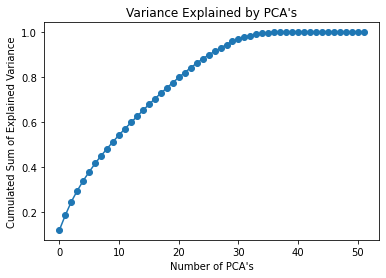

In [41]:
import numpy as np

pca = PCA(n_components=train_set.shape[1])
pca.fit(train_set)
ratios = pca.explained_variance_ratio_
# Plot the explained variance ratios
x = np.arange(train_set.shape[1])
plt.plot(x, np.cumsum(ratios), '-o')
plt.xlabel("Number of PCA's")
plt.ylabel("Cumulated Sum of Explained Variance")
plt.title("Variance Explained by PCA's")

# Find the optimal number of PCA's
for i in range(np.cumsum(ratios).shape[0]):
    if np.cumsum(ratios)[i] >= 0.80:
        num_pca = i + 1
        print("The optimal number of PCA's is: {}".format(num_pca))
        break
    else:
        continue

In [42]:
pca = PCA(n_components=9)

In [43]:
pca_result = pca.fit(train_set)

In [44]:
pca.explained_variance_ratio_

array([0.11897228, 0.06612706, 0.05988768, 0.04906185, 0.04461273,
       0.03942425, 0.03759918, 0.03389032, 0.03135884])

In [45]:
train_set.shape

(36304, 52)

In [46]:
train_set

array([[-0.1978998 , -0.34311753, -0.21942545, ..., -0.04699447,
        -0.09909046,  0.90615597],
       [-0.86461791, -0.34311753, -0.21942545, ..., -0.04699447,
        -0.09909046,  0.90615597],
       [-0.1978998 , -0.34311753, -0.21942545, ..., -0.04699447,
        -0.09909046, -1.10356278],
       ...,
       [-0.1978998 , -0.34311753, -0.21942545, ..., -0.04699447,
        -0.09909046,  0.90615597],
       [-0.1978998 , -0.34311753, -0.21942545, ..., -0.04699447,
        -0.09909046,  0.90615597],
       [-0.1978998 , -0.34311753, -0.21942545, ..., -0.04699447,
        -0.09909046, -1.10356278]])

In [47]:
train_set = pca.transform(train_set)
test_set = pca.transform(test_set)

In [48]:
type(train_set)

numpy.ndarray

In [49]:
# pca = PCA(n_components=3)
pca_result = pca.fit_transform(train_set)
df1 = pd.DataFrame()
df1['pca-one'] = pca_result[:,0]
df1['pca-two'] = pca_result[:,1] 
df1['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.24727831 0.13744809 0.12449123 0.10199706 0.09273228 0.0819538
 0.07823164 0.07057691 0.06529067]


<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

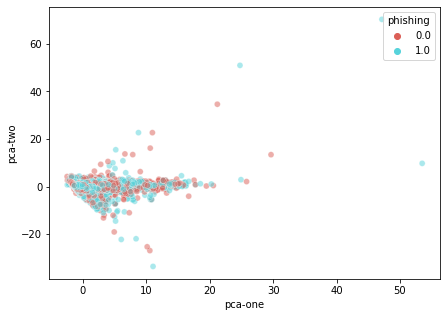

In [50]:

# rndperm = np.random.permutation(df.shape[0])
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df1["pca-one"], y=df1["pca-two"],
    palette=sns.color_palette("hls", 2),
    hue=train_label,
    legend="full",
    alpha=0.5
)

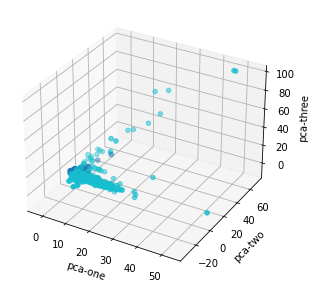

In [51]:
ax = plt.figure(figsize=(7,5)).gca(projection='3d')
ax.scatter(
    xs=df1["pca-one"], 
    ys=df1["pca-two"], 
    zs=df1["pca-three"], 
    c=train_label, 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [52]:
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaler.fit(train_set)
# train_set = scaler.transform(train_set)

# scaler.fit(test_set)
# test_set = scaler.transform(test_set)

In [53]:
from sklearn.model_selection import cross_val_score


## Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
logisticReg1 = LogisticRegression(solver='lbfgs', max_iter=100)

In [56]:
logisticReg = logisticReg1.fit(train_set,train_label)

In [57]:
pred = logisticReg.predict(test_set[0].reshape(1,-1))
pred

array([0])

In [58]:
test_set

array([[-1.02289547, -0.64233774,  0.76848357, ...,  0.38770136,
        -0.07727129, -0.20129545],
       [-0.3551492 ,  0.27025011, -0.36871234, ..., -0.16964402,
        -0.08546482, -0.31580282],
       [ 0.50578865, -3.42436111,  1.07126612, ...,  0.21224839,
         0.81629938, -2.56838138],
       ...,
       [-0.97294653, -0.79903563,  0.88440349, ..., -0.01444805,
        -0.05422066, -0.80290644],
       [ 0.7308102 , -0.7977765 , -0.30190995, ...,  0.2612239 ,
        -0.12073187,  0.1302447 ],
       [-0.2794553 , -0.25107962, -0.10895133, ..., -1.10560235,
         0.12897309, -0.3291863 ]])

### Performance on training set

In [59]:
train_pred = logisticReg.predict(train_set)

Text(0.5, 257.44, 'Predicted label')

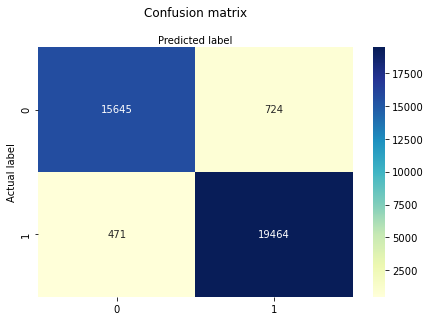

In [60]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(train_label,train_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Performance on test set

In [61]:
test_pred = logisticReg.predict(test_set)
test_pred

array([0, 1, 0, ..., 0, 1, 1])

In [62]:
test_label[0:10]

22199    0
12429    1
42777    1
50863    1
16316    1
31414    0
9622     0
53815    0
25822    0
9741     0
Name: phishing, dtype: int64

In [63]:
logisticReg.score(test_set,test_label)

0.9656169665809768

In [64]:
logisticReg.score(train_set,train_label)

0.9670835169678272

In [65]:
train_score = cross_val_score(logisticReg1, train_set, train_label, cv=10)
train_score.mean()

0.9670282682107623

In [66]:
test_score = cross_val_score(logisticReg1, test_set, test_label, cv=10)
test_score.mean()

0.9689588688946016

In [67]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_label,test_pred)

Text(0.5, 257.44, 'Predicted label')

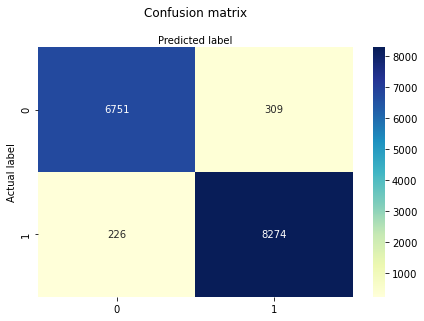

In [68]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# y_train = train_label
# y_pred = train_pred
# print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
# print("Precision:",metrics.precision_score(y_train, y_pred))
# print("Recall:",metrics.recall_score(y_train, y_pred))

In [69]:
y_test = test_label
y_pred = test_pred
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
acc_list.append(metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
precision_list.append(metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
recall_list.append(metrics.recall_score(y_test, y_pred))

Accuracy: 0.9656169665809768
Precision: 0.9639986018874519
Recall: 0.9734117647058823


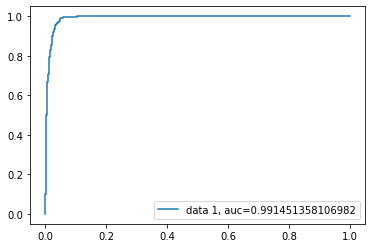

In [70]:
y_pred_proba = logisticReg.predict_proba(test_set)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [71]:
acc_list

[0.9656169665809768]

## Decision Tree Classifier


In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
from sklearn import metrics

In [74]:
test_label

22199    0
12429    1
42777    1
50863    1
16316    1
        ..
41523    0
26658    0
19849    0
4099     1
867      1
Name: phishing, Length: 15560, dtype: int64

In [75]:
clf = DecisionTreeClassifier()
clf = clf.fit(train_set,train_label)

In [76]:
y_pred = clf.predict(train_set)

In [77]:
metrics.accuracy_score(train_label,y_pred)

1.0

In [78]:
y_test_pred = clf.predict(test_set)

In [79]:
metrics.accuracy_score(test_label,y_test_pred)

0.9827120822622109

Text(0.5, 257.44, 'Predicted label')

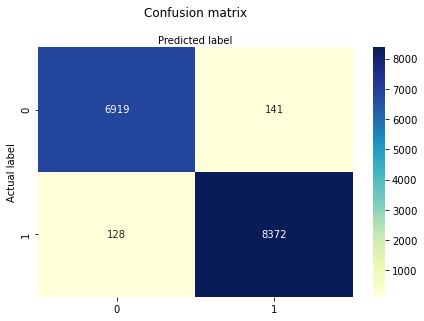

In [80]:
cnf_matrix = metrics.confusion_matrix(test_label,y_test_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [81]:
y_test = test_label
y_pred = y_test_pred
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
acc_list.append(metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
precision_list.append(metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
recall_list.append(metrics.recall_score(y_test, y_pred))

Accuracy: 0.9827120822622109
Precision: 0.9834370962058029
Recall: 0.9849411764705882


In [82]:
acc_list

[0.9656169665809768, 0.9827120822622109]

## Ensemble methods
### Bagging

In [83]:
from sklearn.ensemble import BaggingClassifier

In [84]:
tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree,n_estimators=10,random_state=101)
bagging_clf.fit(train_set,train_label)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=101)

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [86]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [87]:
evaluate(bagging_clf, train_set, test_set, train_label, test_label)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[16352    17]
 [   12 19923]]
ACCURACY SCORE:
0.9992
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.999267      0.999147  0.999201      0.999207      0.999201
recall         0.998961      0.999398  0.999201      0.999180      0.999201
f1-score       0.999114      0.999273  0.999201      0.999193      0.999201
support    16369.000000  19935.000000  0.999201  36304.000000  36304.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[6950  110]
 [  87 8413]]
ACCURACY SCORE:
0.9873
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.987637     0.987094  0.987339      0.987365      0.987340
recall        0.984419     0.989765  0.987339      0.987092      0.987339
f1-score      0.986025     0.988427  0.987339      0.987226      0.987338
support    7060.000000  8500.000000  0.987339  15560.000000  15560.000000


In [88]:
y_test = test_label
y_pred = bagging_clf.predict(test_set)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
acc_list.append(metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
precision_list.append(metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
recall_list.append(metrics.recall_score(y_test, y_pred))

Accuracy: 0.9873393316195372
Precision: 0.9870937463334507
Recall: 0.989764705882353


In [89]:
acc_list

[0.9656169665809768, 0.9827120822622109, 0.9873393316195372]

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf_clf = RandomForestClassifier(random_state=101,n_estimators = 10)
rf_clf.fit(train_set,train_label)
evaluate(rf_clf,train_set,test_set,train_label,test_label)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[16353    16]
 [    9 19926]]
ACCURACY SCORE:
0.9993
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.999450      0.999198  0.999311      0.999324      0.999311
recall         0.999023      0.999549  0.999311      0.999286      0.999311
f1-score       0.999236      0.999373  0.999311      0.999305      0.999311
support    16369.000000  19935.000000  0.999311  36304.000000  36304.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[6961   99]
 [  83 8417]]
ACCURACY SCORE:
0.9883
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.988217     0.988375  0.988303      0.988296      0.988303
recall        0.985977     0.990235  0.988303      0.988106      0.988303
f1-score      0.987096     0.989304  0.988303      0.988200      0.988302
support    7060.000000  8500.000000  0.988303  15560.000000  15560.000000


In [92]:
y_test = test_label
y_pred = rf_clf.predict(test_set)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
acc_list.append(metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
precision_list.append(metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
recall_list.append(metrics.recall_score(y_test, y_pred))

Accuracy: 0.9883033419023136
Precision: 0.9883748238609676
Recall: 0.9902352941176471


In [93]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(n_estimators=50)
adaboost_clf.fit(train_set,train_label)
evaluate(adaboost_clf,train_set,test_set,train_label,test_label)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[15828   541]
 [  547 19388]]
ACCURACY SCORE:
0.9700
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.966595      0.972854  0.970031      0.969725      0.970032
recall         0.966950      0.972561  0.970031      0.969755      0.970031
f1-score       0.966773      0.972707  0.970031      0.969740      0.970031
support    16369.000000  19935.000000  0.970031  36304.000000  36304.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[6820  240]
 [ 270 8230]]
ACCURACY SCORE:
0.9672
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.961918     0.971665  0.967224      0.966791      0.967242
recall        0.966006     0.968235  0.967224      0.967120      0.967224
f1-score      0.963958     0.969947  0.967224      0.966952      0.967229
support    7060.000000  8500.000000  0.967224  15560.000000  15560.000000


In [94]:
y_test = test_label
y_pred = adaboost_clf.predict(test_set)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
acc_list.append(metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
precision_list.append(metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
recall_list.append(metrics.recall_score(y_test, y_pred))

Accuracy: 0.9672236503856041
Precision: 0.9716646989374262
Recall: 0.9682352941176471


In [95]:
models = ['Logistic \nRegression','Decision Tree','Bagging','Random \nForest','Boosting']
# order of results in acc_list - logreg, dec tree, bagging, rf, boosting
acc_list.extend([0.5997429305912596, 0.5496143958868894, 0.6015424164524421, 0.6015424164524421, 0.845694087403599, 0.8693333333333333, 0.8901028277634961, 0.87])
models.extend(['Gaussian NB', 'MultiNomial NB', 'Bagged Gaussian NB', 'Bagged MultiNomial NB', 'Standard SVC', 'Bagged \nStandard SVC', 'Tuned SVC', 'Bagged \nTuned SVC' ])

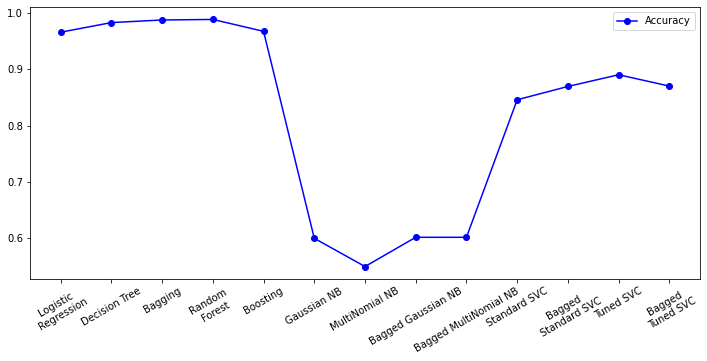

In [100]:
plt.figure(figsize=(12,5))
plt.plot(models, acc_list, 'bo-', label = "Accuracy")
# plt.plot(models, precision_list,'ro-', label = "Precision")
# plt.plot(models, recall_list, 'bo-', label = "Recall")
plt.legend()
plt.xticks(rotation=30)
plt.savefig('result.jpg', transparent=True)
plt.show()